In [1]:
# Importing libraries
import pandas as pd
import numpy as np

from datetime import datetime

# Removing width limit
#pd.options.display.max_columns = None

from IPython.display import display

import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import gaussian_kde

import seaborn as sns

# Not used below
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

In [ ]:
#Choosing data frame for air pollution
path = 'data/kol_con_openaq_hr.csv'
df1 = pd.read_csv(path)

# Preprocess by filling in 0's for NaN's (blanks)
#df1.fillna({'value':0}, inplace=True)
#df.fillna(0, inplace=True)

# Displaying data
df1.head()
#display(df)

# Removing the SS+05:30 from the time
#df1['local'] = df1['local'].map(lambda x: x.rstrip('+05:30'))
#df1['local'] = df1['local'].str.rstrip('+05:30')
#df1['local'] = df1['local'].str.replace(r':00+05:30', '')
#df1['local'] = df1[x[:-4] for x in df['local']]
df1['local'] = df1.apply(lambda x: x['local'][:-9], axis = 1)

df1.drop(['location','city','country','utc','parameter','unit','latitude','longitude','attribution'], axis = 1, inplace=True)

#df1['local2'] = df1['local'].astype(str) + ' ' + df2['Time']
#df1['local2'] = df1.apply(lambda x: x['local'][11:], axis = 1)

#df1.head()
#print(df1)

#df['value'].value_counts().plot('bar')
#df['country'].value_counts().plot('barh') #horizontal
#df1['value'].value_counts().plot('bar')
#df['source'].value_counts().plot('barh') #horizontal

#np.mean(df["age"])

indexNames = df1[df1['value'] < 0].index
df1.drop(indexNames, inplace=True)

df1.plot()
plt.show()

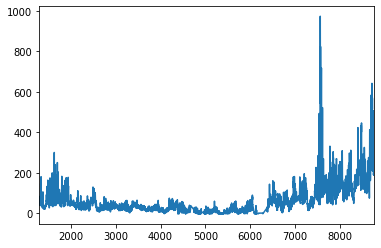

,Date (LT),Raw Conc.,QC Name
1300,2015-02-24 05:00 AM,41.0,Valid
1301,2015-02-24 06:00 AM,46.0,Valid
1302,2015-02-24 07:00 AM,51.0,Valid
1303,2015-02-24 08:00 AM,46.0,Valid
1304,2015-02-24 09:00 AM,55.0,Valid
1305,2015-02-24 10:00 AM,59.0,Valid
1306,2015-02-24 11:00 AM,64.0,Valid
1307,2015-02-24 12:00 PM,69.0,Valid
1308,2015-02-24 01:00 PM,61.0,Valid
1309,2015-02-24 02:00 PM,57.0,Valid


In [2]:
# Choosing data frame for air pollution
path = 'data/Kolkata_PM2.5_2015_YTD.csv'
df1a = pd.read_csv(path)

df1a.drop(['Site', 'Parameter', 'Year', 'Month', 'Day', 'Hour', 'NowCast Conc.', 'AQI', 'AQI Category', 'Conc. Unit', 'Duration'], axis = 1, inplace=True,)

#indexNames = df1f[df1f['Raw Conc.'] < 0].index
#df1f.drop(indexNames, inplace=True)

#indexNames = df1d[df1d['QC Name'] == 'Missing'].index
#df1d.drop(indexNames, inplace=True)

df1a_0 = df1a[~df1a['QC Name'].isin(['Missing','Invalid'])]

#df1a_0 = df1a_0.reset_index()
#df1a_0 = df1a_0.reset_index(drop=True)

df1a_0['Raw Conc.'].plot()
plt.show()

display(df1a_0)
#df1.head(20)

# Choosing data frame for air pollution
path = 'data/Kolkata_PM2.5_2016_YTD.csv'
df1b = pd.read_csv(path)

df1b.drop(['Site', 'Parameter', 'Year', 'Month', 'Day', 'Hour', 'NowCast Conc.', 'AQI', 'AQI Category', 'Conc. Unit', 'Duration'], axis = 1, inplace=True)

df1b_0 = df1b[~df1b['QC Name'].isin(['Missing','Invalid'])]

# Choosing data frame for air pollution
path = 'data/Kolkata_PM2.5_2017_YTD.csv'
df1c = pd.read_csv(path)

df1c.drop(['Site', 'Parameter', 'Year', 'Month', 'Day', 'Hour', 'NowCast Conc.', 'AQI', 'AQI Category', 'Conc. Unit', 'Duration'], axis = 1, inplace=True)

df1c_0 = df1c[~df1c['QC Name'].isin(['Missing','Invalid'])]

# Choosing data frame for air pollution
path = 'data/Kolkata_PM2.5_2018_YTD.csv'
df1d = pd.read_csv(path)

df1d.drop(['Site', 'Parameter', 'Year', 'Month', 'Day', 'Hour', 'NowCast Conc.', 'AQI', 'AQI Category', 'Conc. Unit', 'Duration'], axis = 1, inplace=True)

df1d_0 = df1d[~df1d['QC Name'].isin(['Missing','Invalid'])]

# Choosing data frame for air pollution
path = 'data/Kolkata_PM2.5_2019_YTD.csv'
df1e = pd.read_csv(path)

df1e.drop(['Site', 'Parameter', 'Year', 'Month', 'Day', 'Hour', 'NowCast Conc.', 'AQI', 'AQI Category', 'Conc. Unit', 'Duration'], axis = 1, inplace=True)

df1e_0 = df1e[~df1e['QC Name'].isin(['Missing','Invalid'])]

# Choosing data frame for air pollution
path = 'data/Kolkata_PM2.5_2020_01_MTD.csv'
df1f = pd.read_csv(path)

df1f.drop(['Site', 'Parameter', 'Year', 'Month', 'Day', 'Hour', 'NowCast Conc.', 'AQI', 'AQI Category', 'Conc. Unit', 'Duration'], axis = 1, inplace=True)

df1f_0 = df1f[~df1f['QC Name'].isin(['Missing','Invalid'])]

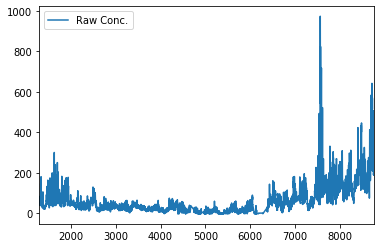

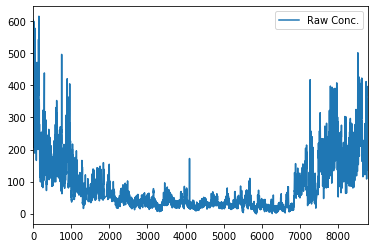

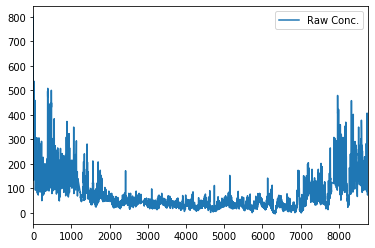

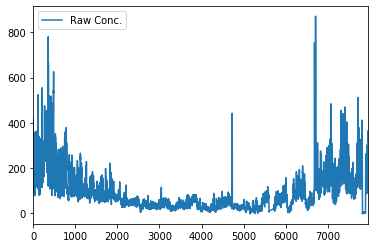

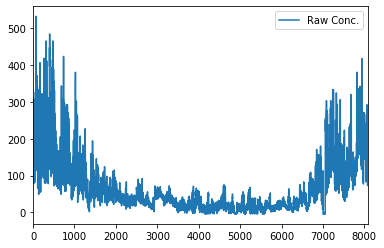

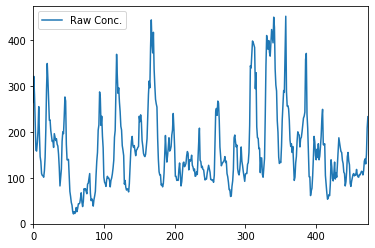

In [3]:
df1a_0.plot()
plt.show()

df1b_0.plot()
plt.show()

df1c_0.plot()
plt.show()

df1d_0.plot()
plt.show()

df1e_0.plot()
plt.show()

df1f_0.plot()

plt.show()

<Figure size 640x480 with 0 Axes>

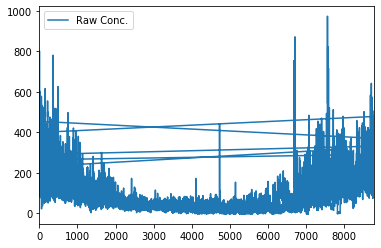

In [13]:
df1_1 = pd.concat([df1a_0, df1b_0, df1c_0, df1d_0, df1e_0, df1f_0])

from matplotlib.pyplot import figure
#figure(num=4, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
#figure(figsize=(7,11))

df1_1.plot()
plt.show()

In [90]:
#Choosing data frame for weather
path = 'data/kol_temp.csv'
df2 = pd.read_csv(path)

# Preprocess by filling in 0's for NaN's (blanks)
#df1.fillna({'value':0}, inplace=True)
#df.fillna(0, inplace=True)

# Displaying data
df2.head()
#display(df)

# Come back to these later ***
df2.drop(['Dew Point', 'Wind', 'Wind Gust', 'Condition'], axis = 1, inplace=True)

# Add a '0' to the time when necessary and convert to HH:MM format removing AM/PM
#df2['local'] = pd.to_datetime(df2['local'], format='%d-%m-%y %I.%M.%S.%f %p')
#df2['Time'] = pd.to_datetime.strptime(df2['Time'], format='%I:%M %p').time()
#print(datetime.strptime('6:00 PM', format='%I:%M %p').time())
#df2['Time'] = pd.to_datetime.strptime(df2['Time'], format='%I:%M %p').time()


#Combining Date and Time to match earlier format
#df2['local'] = df2[['Date', 'Time']].apply(lambda x: ''.join(x), axis=1)
#df2['local'] = df2['Date'].map(str) + 'T' + df2['Time']
#df2['local'] = df2['Date'].astype(str) + 'T' + df2['Time']
#df2['local'] = df2['Date'].astype(str) + ' ' + df2['Time']


df2.head()

#np.mean(df["age"])

# Dropping units
#df['Temperature'] = df['Temperature'].map(lambda x: x.lstrip('whatever').rstrip('whatever'))
df2['Temperature'] = df2['Temperature'].map(lambda x: x.rstrip('F'))
df2['Humidity'] = df2['Humidity'].map(lambda x: x.rstrip('%'))
df2['Wind Speed'] = df2['Wind Speed'].map(lambda x: x.rstrip('mph'))
df2['Pressure'] = df2['Pressure'].map(lambda x: x.rstrip('in'))
df2['Precip.'] = df2['Precip.'].map(lambda x: x.rstrip('in'))
df2.head(15)

#df2.plot()
#plt.show()

,Date,Time,Temperature,Humidity,Wind Speed,Pressure,Precip.
0,2020-01-17,6:30 PM,63,94,7,29.96,0.0
1,2020-01-17,7:00 PM,63,94,7,29.96,0.0
2,2020-01-17,7:30 PM,63,94,7,29.96,0.0
3,2020-01-17,8:00 PM,63,88,3,29.96,0.0
4,2020-01-17,8:30 PM,63,88,6,29.96,0.0
5,2020-01-17,9:00 PM,61,94,6,29.96,0.0
6,2020-01-17,9:30 PM,61,94,6,29.93,0.0
7,2020-01-17,10:00 PM,61,94,6,29.93,0.0
8,2020-01-17,10:30 PM,61,94,6,29.93,0.0
9,2020-01-17,11:00 PM,61,94,7,29.96,0.0


In [84]:
df2['Time2'] = pd.to_datetime(df2['Time'], format='%I:%M %p')
#df2['local'] = pd.to_datetime(df2['local'], format='%Y-%m-%dT%I:%M %p')
df2.head(20)

,Date,Time,Temperature,Humidity,Wind Speed,Pressure,Precip.,local,Time2
0,2020-01-17,6:30 PM,63,94,7,29.96,0.0,2020-01-17 6:30 PM,1900-01-01 18:30:00
1,2020-01-17,7:00 PM,63,94,7,29.96,0.0,2020-01-17 7:00 PM,1900-01-01 19:00:00
2,2020-01-17,7:30 PM,63,94,7,29.96,0.0,2020-01-17 7:30 PM,1900-01-01 19:30:00
3,2020-01-17,8:00 PM,63,88,3,29.96,0.0,2020-01-17 8:00 PM,1900-01-01 20:00:00
4,2020-01-17,8:30 PM,63,88,6,29.96,0.0,2020-01-17 8:30 PM,1900-01-01 20:30:00
5,2020-01-17,9:00 PM,61,94,6,29.96,0.0,2020-01-17 9:00 PM,1900-01-01 21:00:00
6,2020-01-17,9:30 PM,61,94,6,29.93,0.0,2020-01-17 9:30 PM,1900-01-01 21:30:00
7,2020-01-17,10:00 PM,61,94,6,29.93,0.0,2020-01-17 10:00 PM,1900-01-01 22:00:00
8,2020-01-17,10:30 PM,61,94,6,29.93,0.0,2020-01-17 10:30 PM,1900-01-01 22:30:00
9,2020-01-17,11:00 PM,61,94,7,29.96,0.0,2020-01-17 11:00 PM,1900-01-01 23:00:00


In [50]:
df2['Time2'] = df2.apply(lambda x: x['local'][11:], axis = 1)
df2.head(20)

,Date,Time,Temperature,Humidity,Wind Speed,Pressure,Precip.,local,Time2
0,2020-01-17,1900-01-01 18:30:00,63,94,7,29.96,0.0,2020-01-17 6:30 PM,6:30 PM
1,2020-01-17,1900-01-01 19:00:00,63,94,7,29.96,0.0,2020-01-17 7:00 PM,7:00 PM
2,2020-01-17,1900-01-01 19:30:00,63,94,7,29.96,0.0,2020-01-17 7:30 PM,7:30 PM
3,2020-01-17,1900-01-01 20:00:00,63,88,3,29.96,0.0,2020-01-17 8:00 PM,8:00 PM
4,2020-01-17,1900-01-01 20:30:00,63,88,6,29.96,0.0,2020-01-17 8:30 PM,8:30 PM
5,2020-01-17,1900-01-01 21:00:00,61,94,6,29.96,0.0,2020-01-17 9:00 PM,9:00 PM
6,2020-01-17,1900-01-01 21:30:00,61,94,6,29.93,0.0,2020-01-17 9:30 PM,9:30 PM
7,2020-01-17,1900-01-01 22:00:00,61,94,6,29.93,0.0,2020-01-17 10:00 PM,10:00 PM
8,2020-01-17,1900-01-01 22:30:00,61,94,6,29.93,0.0,2020-01-17 10:30 PM,10:30 PM
9,2020-01-17,1900-01-01 23:00:00,61,94,7,29.96,0.0,2020-01-17 11:00 PM,11:00 PM


In [27]:
# Merge both dataframes by time
df1.merge(df2, left_on='local', right_on='local')

,local,value,Date,Time,Temperature,Humidity,Wind Speed,Pressure,Precip.


In [1]:
#df['value'].value_counts() #generate counts

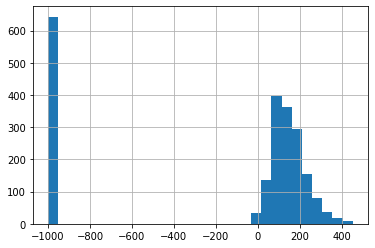

In [6]:
#df['value'].hist(bins=30)
df['value'].hist(bins=30)

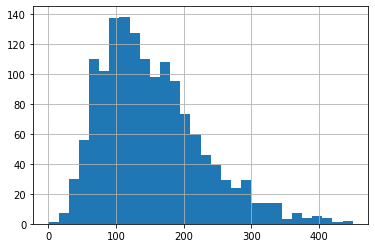

In [8]:
df['value'].hist(bins=30, range=[0,450])
#df['age'].hist(bins=30, range=[15,44], facecolor='gray')

In [44]:
df['converted'].value_counts() #generate counts

0    306000
1     10200
Name: converted, dtype: int64

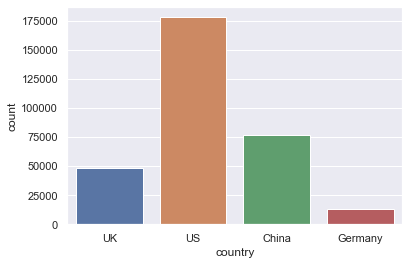

In [81]:
sns.countplot(x="country", data=df)

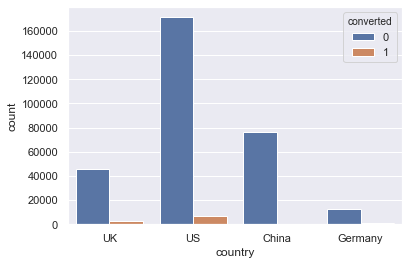

In [84]:
sns.countplot(x="country", hue="converted", data=df)

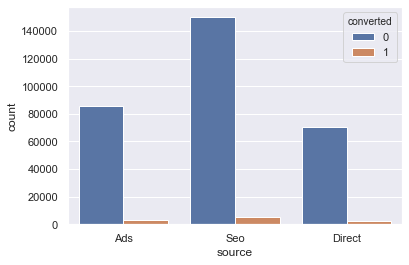

In [85]:
sns.countplot(x="source", hue="converted", data=df)

In [ ]:
sns.countplot(x="source", hue="converted", data=df)

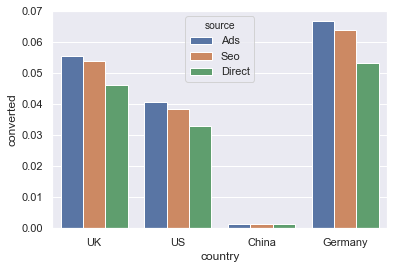

In [76]:
# Normalised
sns.barplot(x="country", y='converted', hue='source', 
    data=df, ci=None);


(178092, 6)
(48450, 6)


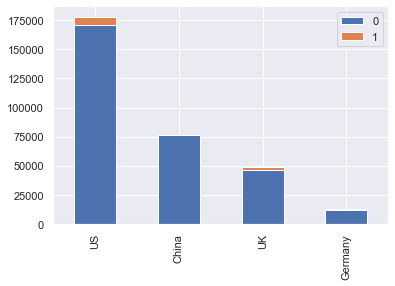

In [63]:
dataus = df[(df.country=="US")]
datauk = df[(df.country=="UK")]
datac = df[(df.country=="China")]
datag = df[(df.country=="Germany")]
print (dataus.shape)
print (datauk.shape)

dusc = dataus.converted.value_counts()
dukc = datauk.converted.value_counts()
dcc = datac.converted.value_counts()
dgc = datag.converted.value_counts()

df2 = pd.DataFrame([dusc,dcc, dukc, dgc])
df2.index = ['US','China','UK','Germany']
df2.plot(kind='bar', stacked=True);

In [90]:
df.shape
print ("Percentage of conversios: {:.2%}".format(df.converted.mean()))

Percentage of conversios: 3.23%


In [12]:
x = df["age"]
y = df["converted"]

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=100, edgecolor='')
plt.show()

KeyboardInterrupt: 

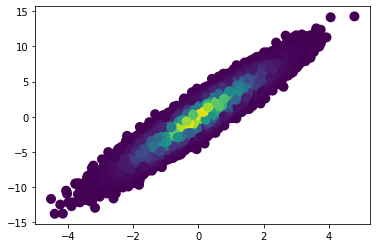

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Generate fake data
x = np.random.normal(size=100000)
y = x * 3 + np.random.normal(size=100000)

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=100, edgecolor='')
plt.show()

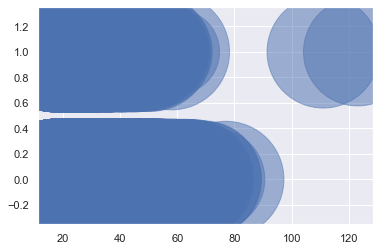

In [64]:
x = df["age"]
y = df["converted"]
z = df.groupby(x).count()
#x = [0,2,4,6,8,10]
#y = [0]*len(x)
#s = [20*2**n for n in range(len(x))]

#plt.scatter(x, y, s=df.groupby(x).count(), alpha=0.5)
df.groupby(x).count()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


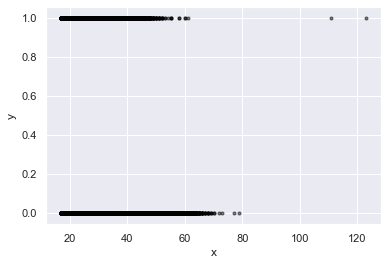

In [99]:
# Scatter plots
x = exam_data['age']
y = exam_data['converted']
colors = (0,0,0)
area = np.pi*3
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
#plt.title('Final_Exam vs Homework_1')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


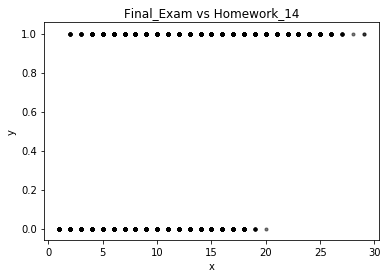

In [4]:
# Scatter plots
x = exam_data['total_pages_visited']
y = exam_data['converted']
colors = (0,0,0)
area = np.pi*3
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Final_Exam vs Homework_14')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


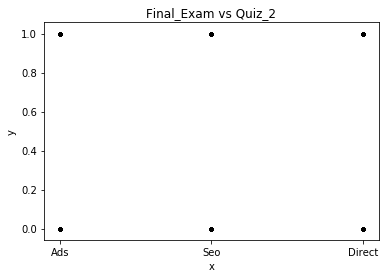

In [5]:
# Scatter plots
x = exam_data['source']
y = exam_data['converted']
colors = (0,0,0)
area = np.pi*3
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Final_Exam vs Quiz_2')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# Can't use linear regression or decision trees on categorical data
# and consequently we use scikit-learn's OneHotEncoder to assign
# numeric values to the two categorical variables: country and source

# Although I don't see any theoretical reason why decision trees
# can't run with categorical data, I ran into errors when I tried to
# use scikit-learn's DecisionTreeRegressor

In [ ]:
from sklearn import preprocessing
# TODO: create a LabelEncoder object and fit it to each feature in X


# 1. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
le = preprocessing.LabelEncoder()


# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
X_2 = X.apply(le.fit_transform)
X_2.head()

In [ ]:
# TODO: create a OneHotEncoder object, and fit it to all of X

# 1. INSTANTIATE
enc = preprocessing.OneHotEncoder()

# 2. FIT
enc.fit(X_2)

# 3. Transform
onehotlabels = enc.transform(X_2).toarray()
onehotlabels.shape

# as you can see, you've the same number of rows 891
# but now you've so many more columns due to how we changed all the categorical data into numerical data

In [14]:
# Linear Model using scikitlearn
from sklearn import linear_model as lm

X = exam_data[["Exam_Mean"]]
y= exam_data["Final_Exam"]

# Fit the linear model
linear_model = lm.LinearRegression()
results = linear_model.fit(X,y)

# Print the coeffecients
print (linear_model.intercept_, linear_model.coef_)

# RMS Error Calculation
#N = len(y)
#rmse_test = np.sqrt(np.sum((np.array(y).flatten() - np.array(results).flatten())**2)/N)
#print("RMSE TEST: ", rmse_test)

#from sklearn.metrics import mean_squared_error
#from math import sqrt

#rms = sqrt(mean_squared_error(y, results))

-3.203985690572651 [1.29383733]


In [15]:
# Linear Model using Statsmodels
import statsmodels.api as sm

X = sm.add_constant(X)

# Fit the linear model
linear_model_2 = sm.OLS(y, X).fit()
#predictions = linear_model.predict(X)

# Print the regression results
linear_model_2.summary()

# RMS Error Calculation
# N = len(y)
# rmse_test = np.sqrt(np.sum((np.array(y).flatten() - np.array(results).flatten())**2)/N)
# print("RMSE TEST: ", rmse_test)

C:\Users\shuvr\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Final_Exam   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     3066.
Date:                Fri, 20 Dec 2019   Prob (F-statistic):               0.00
Time:                        14:54:45   Log-Likelihood:                -4380.8
No. Observations:                1177   AIC:                             8766.
Df Residuals:                    1175   BIC:                             8776.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2040      0.724     -4.424      0.000      -4.625      -1.783
Exam_Mean      1.2938      0.023     55.372      0.000       1.248       1.340
==============================================================================
Omnibus:                        3.895   Durbin-Watson:                   0.944
Prob(Omnibus):                  0.143   Jarque-Bera (JB):                4.316
Skew:                          -0.049   Prob(JB):                        0.116
Kurtosis:                       3.280   Cond. No.                         77.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

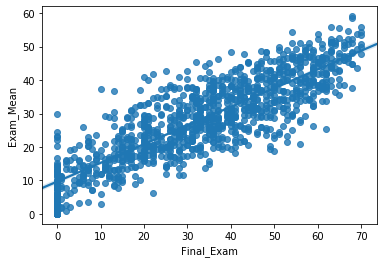

In [16]:
import seaborn as sns
sns.regplot(x='Final_Exam', y='Exam_Mean', data=exam_data)

In [17]:
X = exam_data[["HW_Mean","Quiz_Mean","Exam_Mean"]]
y= exam_data["Final_Exam"]

linear_model = lm.LinearRegression()
results = linear_model.fit(X,y)

print (linear_model.intercept_, linear_model.coef_)

-9.277429314824722 [0.16051946 1.38325456 1.0975573 ]


In [18]:
X = sm.add_constant(X)

linear_model_2 = sm.OLS(y, X).fit()

linear_model_2.summary()

C:\Users\shuvr\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Final_Exam   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     1097.
Date:                Fri, 20 Dec 2019   Prob (F-statistic):               0.00
Time:                        14:55:02   Log-Likelihood:                -4349.8
No. Observations:                1177   AIC:                             8708.
Df Residuals:                    1173   BIC:                             8728.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.2774      1.078     -8.603      0.000     -11.393      -7.162
HW_Mean        0.1605      0.109      1.478      0.140      -0.053       0.374
Quiz_Mean      1.3833      0.237      5.844      0.000       0.919       1.848
Exam_Mean      1.0976      0.034     32.124      0.000       1.031       1.165
==============================================================================
Omnibus:                        2.693   Durbin-Watson:                   0.928
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                2.756
Skew:                          -0.051   Prob(JB):                        0.252
Kurtosis:                       3.214   Cond. No.                         129.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
y = df.converted

features = ['country', 'age', 'new_user','source','total_pages_visited']
X = df[features]

#X.describe()
X.head()

,country,age,new_user,source,total_pages_visited
0,UK,25,1,Ads,1
1,US,23,1,Seo,5
2,US,28,1,Seo,4
3,China,39,1,Seo,5
4,US,30,1,Seo,6


In [69]:
from sklearn.model_selection import train_test_split as tts

# Split data into training and validation data
train_X, val_X, train_y, val_y = tts(X, y, random_state = 1)

In [94]:
num_test = 0.5
train, test, train_target, test_target = tts(df.drop(['converted'], axis=1), df.converted, test_size=num_test, random_state=23)
train_features = train.values
test_features = test.values
print ("Training Data (rows, columns): {}".format(str(train_features.shape)))
print ("Testing Data (rows, columns): {}".format(str(test_features.shape)))

Training Data (rows, columns): (158100, 5)
Testing Data (rows, columns): (158100, 5)


In [96]:
from sklearn.ensemble import RandomForestClassifier
import time;

clfr = RandomForestClassifier(max_depth = 35, min_samples_split=2, n_estimators = 20, random_state = 2)
start = time.time()
model = clfr.fit(train_features,train_target)
end = time.time()
print("Training Time: {:.2f} seconds.".format(end - start))
print("Classifier Score: {:.2%}".format(model.score(train_features,train_target)))
joblib.dump(model, datafile+'-RFclf.pkl');

ValueError: could not convert string to float: 'China'

In [70]:
train_X.describe()

,age,new_user,total_pages_visited
count,237150.000000,237150.000000,237150.000000
mean,30.568273,0.684862,4.869433
std,8.267990,0.464572,3.340060
min,17.000000,0.000000,1.000000
25%,24.000000,0.000000,2.000000
50%,30.000000,1.000000,4.000000
75%,36.000000,1.000000,7.000000
max,111.000000,1.000000,29.000000


In [71]:
val_X.describe()

,age,new_user,total_pages_visited
count,79050.000000,79050.000000,79050.000000
mean,30.574611,0.687274,4.883567
std,8.283276,0.463607,3.344231
min,17.000000,0.000000,1.000000
25%,24.000000,0.000000,2.000000
50%,30.000000,1.000000,4.000000
75%,36.000000,1.000000,7.000000
max,123.000000,1.000000,27.000000


In [72]:
from sklearn.tree import DecisionTreeRegressor as dtr

# Fit Decision Tree Model
df_model = dtr(random_state = 1)
df_model.fit(train_X,train_y)

# Predict using DTM
from sklearn.metrics import mean_absolute_error as mae
val_fin = df_model.predict(val_X)

# Display MAE
print(mae(val_y, val_fin))

ValueError: could not convert string to float: 'US'

In [26]:
# Write subroutine to return mae
#def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
#    model = dtr(max_leaf_nodes=max_leaf_nodes, random_state=1)
#    model.fit(train_X, train_y)
#    val_fin = exam_model.predict(val_X)
#    ret_mae = mae(val_y, val_fin)
#    return(ret_mae)

# Find best fit (balance between underfitting and overfitting)
#for max_leaf_nodes in [2, 5, 50, 500, 5000]:
#    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
#    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))
    
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Fit Random Forest Model
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)

# Predict using RFM
melb_preds = forest_model.predict(val_X)

# Display MAE
print(mean_absolute_error(val_y, melb_preds))

8.448813559322033


C:\Users\shuvr\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [129]:
# Now build a Neural Network, using TensorFlow
# See how predictions compare